# The space $U$

Let's call an interval $\left[0, \ 1 \right]$ and say that we have $(n+p+1)$ points on it.

$$
U = \left[u_0, \ u_{1}, \ \cdots, \ u_{p}, \ u_{p+1}, \ \cdots, \ \ u_{n}, \ u_{n+1}, \ \cdots, \ u_{n+p}\right]
$$

These values are ordened, and bounded by $0$ and $1$. That means:

$$
0 = u_0 = u_{1} = \cdots = u_{p} < u_{p+1} \le \cdots \le u_{n-1} < u_{n} = \cdots = u_{n+p} = 1 
$$

$$
U = \left[\underbrace{0, \ 0, \ \cdots, \ 0}_{p+1}, \ \underbrace{u_{p+1}, \ \cdots, \ u_{n-1}}_{n-p-1}, \ \underbrace{1, \ 1, \ \cdots, \ 1}_{p+1}\right]
$$

We can see that 

$$
n - p - 1 \ge 0 \Longrightarrow n \ge p+1
$$

And for simplicity, let's say that $p$ can assume only a few values.

$$
p \in \left\{0, \ 1, \ 2, \ 3, \ 4\right\}
$$

Although it's possible that $p$ can be greater than $4$, it's not very usefull having it.

As exemple, let's make a function to create $U$ uniform using the values of $p$ and $n$:

In [129]:
import numpy as np
np.set_printoptions(precision=2)  # To get a better print

def U_uniform(p: int, n: int):
    if not (n > p):
        raise ValueError("Must n > p. Received (n, p) = (%d, %d)" % (n, p))
    Umid = np.linspace(0, 1, n - p + 1)  # Contains 0 at begin and 1 at the end
    Uleft = np.zeros(p)
    Uright = np.ones(p)
    U = np.concatenate([Uleft, Umid, Uright])
    return U

Making some tests:

In [130]:
print("(p, n) = (0, 1): ", U_uniform(0, 1))
print("(p, n) = (0, 2): ", U_uniform(0, 2))
print("(p, n) = (0, 3): ", U_uniform(0, 3))
print("(p, n) = (1, 2): ", U_uniform(1, 2))
print("(p, n) = (1, 3): ", U_uniform(1, 3))
print("(p, n) = (1, 4): ", U_uniform(1, 4))
print("(p, n) = (2, 3): ", U_uniform(2, 3))
print("(p, n) = (2, 4): ", U_uniform(2, 4))
print("(p, n) = (2, 5): ", U_uniform(2, 5))

(p, n) = (0, 1):  [ 0.  1.]
(p, n) = (0, 2):  [ 0.   0.5  1. ]
(p, n) = (0, 3):  [ 0.    0.33  0.67  1.  ]
(p, n) = (1, 2):  [ 0.  0.  1.  1.]
(p, n) = (1, 3):  [ 0.   0.   0.5  1.   1. ]
(p, n) = (1, 4):  [ 0.    0.    0.33  0.67  1.    1.  ]
(p, n) = (2, 3):  [ 0.  0.  0.  1.  1.  1.]
(p, n) = (2, 4):  [ 0.   0.   0.   0.5  1.   1.   1. ]
(p, n) = (2, 5):  [ 0.    0.    0.    0.33  0.67  1.    1.    1.  ]


# Basis B-spline functions

Now, let's say that we have $n$ functions given by

$$
N_{i, 0}(u) =
\begin{cases}
1 \ \ \ \text{if} \ u_{i} \le u < u_{i+1} \\ 
0 \ \ \ \text{else}
\end{cases}; \ \ \ \ \ \ \ \forall \ i = \left\{0, \ 1, \ 2, \ \cdots, \ n-1\right\}
$$

And the others are defined recursively like

$$
N_{i,j}(u) = \dfrac{u-u_{i}}{u_{i+j}-u_{i}} \cdot N_{i,j-1}(u) + \dfrac{u_{i+j+1}-u}{u_{i+j+1}-u_{i+1}} \cdot N_{i+1,j-1}(u); \ \ \ \ \ \ \ \ \ \ \forall \
\begin{cases}
i = 0, \ 1, \ \cdots, \ n-1 \\
j = 1, \ 2, \ \cdots, \ p
\end{cases}
$$

To the equation below, we set

$$
N_{i,n}(u) = 0 \ \forall \ u
$$

### Example 1

Let's plot when $U$ is uniform, with $p=2$ and $n = 6$:

$$
U = \begin{bmatrix}
\underbrace{0}_{u_0} & \underbrace{0}_{u_1} & \underbrace{0}_{u_2} & \underbrace{0.25}_{u_3} & \underbrace{0.5}_{u_4} & \underbrace{0.75}_{u_5} & \underbrace{1}_{u_6} & \underbrace{1}_{u_7} & \underbrace{1}_{u_8}
\end{bmatrix}_{(9)}
$$

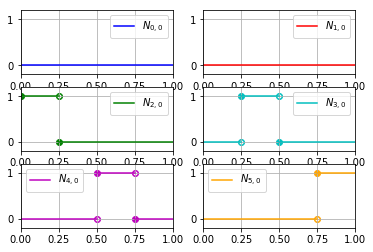

In [131]:
from matplotlib import pyplot as plt

fig, axss = plt.subplots(3, 2)
colors = ["b", "r", "g", "c", "m", "orange"]
axs = axss.flat
u2, u3, u4, u5, u6 = 0, 0.25, 0.5, 0.75, 1
axs[0].plot((u2, u6), (0, 0), color=colors[0], label=r"$N_{0,0}$")

axs[1].plot((u2, u6), (0, 0), color=colors[1], label=r"$N_{1,0}$")

axs[2].plot((u2, u3), (1, 1), color=colors[2])
axs[2].plot((u3, u6), (0, 0), color=colors[2], label=r"$N_{2,0}$")
axs[2].scatter((u2, u3, u3), (1, 0, 1), marker="o", color=colors[2])
axs[2].scatter((u3), (1), marker=".", color="w")

axs[3].plot((u2, u3), (0, 0), color=colors[3], label=r"$N_{3,0}$")
axs[3].plot((u3, u4), (1, 1), color=colors[3])
axs[3].plot((u4, u6), (0, 0), color=colors[3])
axs[3].scatter((u3, u3, u4, u4), (0, 1, 0, 1), marker="o", color=colors[3])
axs[3].scatter((u3, u4), (0, 1), marker=".", color="w")

axs[4].plot((u2, u4), (0, 0), color=colors[4])
axs[4].plot((u4, u5), (1, 1), color=colors[4], label=r"$N_{4,0}$")
axs[4].plot((u5, u6), (0, 0), color=colors[4])
axs[4].scatter((u5, u5, u4, u4), (0, 1, 0, 1), marker="o", color=colors[4])
axs[4].scatter((u4, u5), (0, 1), marker=".", color="w")

axs[5].plot((u2, u5), (0, 0), color=colors[5], label=r"$N_{5,0}$")
axs[5].plot((u5, u6), (1, 1), color=colors[5])
axs[5].scatter((u5, u5), (0, 1), marker="o", color=colors[5])
axs[5].scatter((u5), (0), marker=".", color="w")
for ax in axs:
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.2, 1.2)
    ax.legend()
    ax.xaxis.set_ticks([u2, u3, u4, u5, u6])
    ax.yaxis.set_ticks([0, 1])
    ax.grid()

And the others functions, recursively determined are like

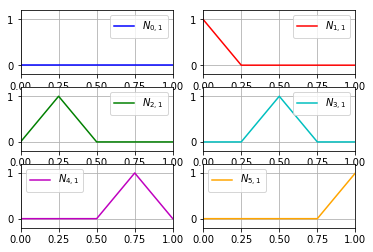

In [132]:
fig, axss = plt.subplots(3, 2)
colors = ["b", "r", "g", "c", "m", "orange"]
axs = axss.flat
u2, u3, u4, u5, u6 = 0, 0.25, 0.5, 0.75, 1
axs[0].plot((u2, u6), (0, 0), color=colors[0], label=r"$N_{0,1}$")

axs[1].plot((u2, u3, u6), (1, 0, 0), color=colors[1], label=r"$N_{1,1}$")

axs[2].plot((u2, u3, u4, u6), (0, 1, 0, 0), color=colors[2], label=r"$N_{2,1}$")

axs[3].plot((u2, u3, u4, u5, u6), (0, 0, 1, 0, 0), color=colors[3], label=r"$N_{3,1}$")

axs[4].plot((u2, u4, u5, u6), (0, 0, 1, 0), color=colors[4], label=r"$N_{4,1}$")

axs[5].plot((u2, u5, u6), (0, 0, 1), color=colors[5], label=r"$N_{5,1}$")
for ax in axs:
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.2, 1.2)
    ax.legend()
    ax.xaxis.set_ticks([u2, u3, u4, u5, u6])
    ax.yaxis.set_ticks([0, 1])
    ax.grid()

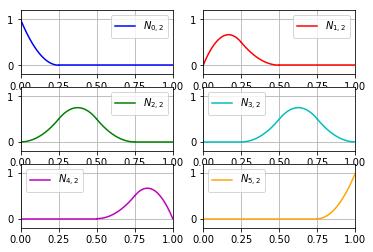

In [133]:
fig, axss = plt.subplots(3, 2)
colors = ["b", "r", "g", "c", "m", "orange"]
axs = axss.flat
u2, u3, u4, u5, u6 = 0, 0.25, 0.5, 0.75, 1
du = np.linspace(u2, u3, 129)
axs[0].plot(u2+du, (1-4*du)**2, color=colors[0])
axs[0].plot((u3, u6), (0, 0), color=colors[0], label=r"$N_{0,2}$")

axs[1].plot(u2+du, 8*du*(1-3*du), color=colors[1])
axs[1].plot(u3+du, 8*(u4-u5+du)**2, color=colors[1])
axs[1].plot((u4, u6), (0, 0), color=colors[1], label=r"$N_{1,2}$")

axs[2].plot(u2+du, 8*du**2, color=colors[2])
axs[2].plot(u3+du, 0.75-0.25*(1-8*du)**2, color=colors[2])
axs[2].plot(u4+du, 8*(0.25-du)**2, color=colors[2])
axs[2].plot((u5, u6), (0, 0), color=colors[2], label=r"$N_{2,2}$")

axs[3].plot((u2, u3), (0, 0), color=colors[3], label=r"$N_{3,2}$")
axs[3].plot(u3+du, 8*du**2, color=colors[3])
axs[3].plot(u4+du, 0.75-0.25*(1-8*du)**2, color=colors[3])
axs[3].plot(u5+du, 8*(0.25-du)**2, color=colors[3])

axs[4].plot(u5-du, 8*(u4-u5+du)**2, color=colors[4])
axs[4].plot(u6-du, 8*du*(1-3*du), color=colors[4])
axs[4].plot((u2, u4), (0, 0), color=colors[4], label=r"$N_{4,2}$")

axs[5].plot(u5+du, 16*du**2, color=colors[5])
axs[5].plot((u2, u5), (0, 0), color=colors[5], label=r"$N_{5,2}$")
for ax in axs:
    ax.set_xlim(0, 1)
    ax.set_ylim(-0.2, 1.2)
    ax.legend()
    ax.xaxis.set_ticks([u2, u3, u4, u5, u6])
    ax.yaxis.set_ticks([0, 1])
    ax.grid()

### Exemple 2

For this example, we put $p = 3$ and $n=8$ which gives us the following $U$

$$
U = \begin{bmatrix}
\underbrace{0}_{u_0} & \underbrace{0}_{u_1} & \underbrace{0}_{u_2} & \underbrace{0}_{u_3} & \underbrace{0.2}_{u_4} & \underbrace{0.4}_{u_5} & \underbrace{0.6}_{u_6} & \underbrace{0.8}_{u_7} & \underbrace{1}_{u_8} & \underbrace{1}_{u_9} & \underbrace{1}_{u_{10}} & \underbrace{1}_{u_{11}}
\end{bmatrix}_{(12)}
$$

In [134]:
p, n = 3, 8
U = U_uniform(p, n)
print("U = ", U)

U =  [ 0.   0.   0.   0.   0.2  0.4  0.6  0.8  1.   1.   1.   1. ]


To make it easier, we use the code already made for $N$:

In [135]:
from Bspline import SplineFunction

N = SplineFunction(U)
u = np.linspace(0, 1, 1025)

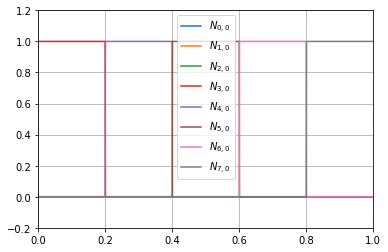

In [136]:
j = 0
for i in range(n):
    Nij = N[i, j](u)
    plt.plot(u, Nij, label=r"$N_{%d,%d}$"%(i, j))
plt.grid()
plt.xlim(0, 1)
plt.ylim(-0.2, 1.2)
plt.legend()

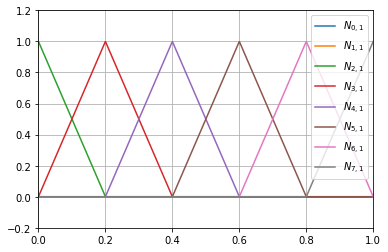

In [137]:
j = 1
for i in range(n):
    Nij = N[i, j](u)
    plt.plot(u, Nij, label=r"$N_{%d,%d}$"%(i, j))
plt.grid()
plt.xlim(0, 1)
plt.ylim(-0.2, 1.2)
plt.legend()

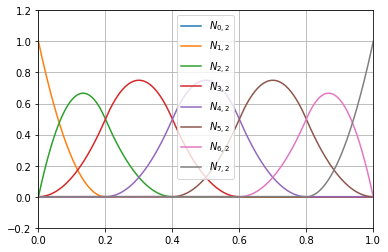

In [138]:
j = 2
for i in range(n):
    Nij = N[i, j](u)
    plt.plot(u, Nij, label=r"$N_{%d,%d}$"%(i, j))
plt.grid()
plt.xlim(0, 1)
plt.ylim(-0.2, 1.2)
plt.legend()

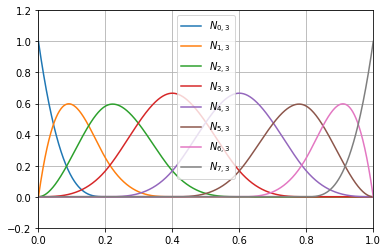

In [139]:
j = 3
for i in range(n):
    Nij = N[i, j](u)
    plt.plot(u, Nij, label=r"$N_{%d,%d}$"%(i, j))
plt.grid()
plt.xlim(0, 1)
plt.ylim(-0.2, 1.2)
plt.legend()

# Properties

There are some nice properties with this type of function which are



##### 1: Local support property

The function $N_{i,j}(u)$ is localized, which means

$$
N_{i,j}(u) = 0 \ \forall \ u \notin \left[u_{i},u_{i+j+1}\right)
$$

##### 2: Non-zero functions in interval

In a given subinterval $\left[u_{k}, \ u_{k+1}\right)$, at most $j+1$ functions are not zero.

With $k-j \le i \le k$, only the functions $N_{i,j}(u)$ are not zero

$$
N_{i,j}(u) = 0 \ \text{in} \ \left[u_{k}, \ u_{k+1}\right) \ \ \ \ \text{if} \ (i < k-j) \ \text{or} \ (k < i)
$$

##### 3: Functions zero at begin

With $0 \le j \le p$ 

$$
N_{i,p-j}(u) = 0 \ \ \ \ \forall \ i < j 
$$

That means

* $N_{0,0}(u) = N_{1,0}(u) = \cdots = N_{p-2, 0}(u) = N_{p-1, 0}(u) = 0 $
* $N_{0,1}(u) = N_{1,1}(u) = \cdots = N_{p-2, 1}(u) = 0$
* $\vdots$
* $N_{0,p-2}(u) = N_{1,p-2}(u) = 0$
* $N_{0,p-1}(u) = 0$

##### 4: The sum is equal 1

For any subinterval $\left[u_{k}, \ u_{k+1}\right)$ we have

$$
\sum_{i=0}^{n-1} N_{i,j}(u) = \sum_{i=k-j}^{k} N_{i,j}(u) = 1 \ \ \ \ \forall \ u \in \left[u_{k}, \ u_{k+1}\right)
$$

##### 5: Only one maximum

Except when $j=0$, the function $N_{i,j}(u)$ attains exactly one maximum value. 

##### 6: Degrees of freedom

The vector $U$ with $n+p+1$ points makes a base for a polinomial of degree $p$ and $n$ degrees of freedom.

As $N_{i,p}$ is a polynomial of degree $p$, and we have $n$ of these functions, we can make any piece-wise using

$$
P(u) = \sum_{i=0}^{n-1} P_{i} N_{i,p}(u)
$$

